In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
!nvidia-smi

Wed Sep 22 15:06:04 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [16]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15308, done.
remote: Total 15308 (delta 0), reused 0 (delta 0), pack-reused 15308
Receiving objects: 100% (15308/15308), 13.70 MiB | 5.45 MiB/s, done.
Resolving deltas: 100% (10402/10402), done.
Checking out files: 100% (2044/2044), done.


In [17]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/drive/My Drive/OpenCV/darknet


In [18]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [19]:
!cp cfg/yolov3-tiny.cfg cfg/yolov3_training.cfg

In [20]:
!sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
!sed -i 's/max_batches = 500200/max_batches = 2000/' cfg/yolov3_training.cfg
# cfg and change steps to 80% & 90% of max_batches
!sed -i '610 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '696 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '783 s@classes=80@classes=1@' cfg/yolov3_training.cfg
# filters formula = (5+numclasses)*3
!sed -i '603 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '689 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '776 s@filters=255@filters=18@' cfg/yolov3_training.cfg

In [21]:
!pwd

/content/drive/My Drive/OpenCV/darknet


In [23]:
%cd /content/drive/MyDrive/OpenCV/Data_Set_Number_Plate 

/content/drive/.shortcut-targets-by-id/18C-s5HYGG1ONh3F59mnU4ZU4v7Jhs6-I/Data Set Number Plate


In [24]:
%cd /content/drive/MyDrive/OpenCV

/content/drive/MyDrive/OpenCV


In [32]:
!unzip /content/drive/MyDrive/OpenCV/Data_Set_Number_Plate/HighwayData-20210915T135128Z-001.zip

Archive:  /content/drive/MyDrive/OpenCV/Data_Set_Number_Plate/HighwayData-20210915T135128Z-001.zip
  inflating: HighwayData/25032021173320667522.txt  
  inflating: HighwayData/25032021173306584039.txt  
  inflating: HighwayData/25032021173235019752.txt  
  inflating: HighwayData/25032021173301103745.txt  
  inflating: HighwayData/25032021173305285691.txt  
  inflating: HighwayData/25032021173310083539.txt  
  inflating: HighwayData/25032021173337553500.txt  
  inflating: HighwayData/25032021173345033207.txt  
  inflating: HighwayData/25032021173342133690.txt  
  inflating: HighwayData/25032021173352825071.txt  
  inflating: HighwayData/25032021173346070329.txt  
  inflating: HighwayData/25032021173333304226.txt  
  inflating: HighwayData/25032021173305484519.txt  
  inflating: HighwayData/25032021173411436935.txt  
  inflating: HighwayData/25032021173255718713.txt  
  inflating: HighwayData/25032021173317339490.txt  
  inflating: HighwayData/25032021173330025380.txt  
  inflating: High

In [42]:
%cd /content/darknet/data

/content/darknet/data


In [43]:
!python /content/create-txt.py

In [44]:
!pwd

/content/darknet/data


In [45]:
%cd ..

/content/darknet


In [46]:
!mv train.txt /content/darknet/data/train.txt
!mv valid.txt /content/darknet/data/valid.txt

In [47]:
%cd /content/darknet

/content/darknet


In [48]:
!echo -e 'Number Plate' > data/obj.names
!mkdir data/backup
!echo -e 'classes= 1\ntrain  = data/train.txt\nvalid  = data/valid.txt\nnames = data/obj.names\nbackup = data/backup/' > data/obj.data

In [49]:
!cp cfg/yolov3_training.cfg data/backup/yolov3_training.cfg
!cp data/obj.names data/backup/classes.txt

In [51]:
!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
 1904: 0.740037, 0.909278 avg loss, 0.001000 rate, 1.714151 seconds, 121856 images, 0.130508 hours left
Loaded: 0.290747 seconds - performance bottleneck on CPU or Disk HDD/SSD
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.696128), count: 9, class_loss = 0.947442, iou_loss = 0.517947, total_loss = 1.465389 
 total_bbox = 265974, rewritten_bbox = 0.000752 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.565241), count: 11, class_loss = 2.002429, iou_loss = 0.777534, total_loss = 2.779963 
 total_bbox = 265985, rewritten_bbox = 0.000752 

In [52]:
import cv2 
from google.colab.patches import cv2_imshow

def display_pred():
  im = cv2.imread('predictions.jpg')
  im = cv2.cvtColor(im ,cv2.COLOR_BGR2RGB)
  cv2_imshow(im)

In [53]:
!wget https://emerging-europe.com/wp-content/uploads/2018/07/maxresdefault-990x556-1.jpg -O test.jpg

--2021-09-22 16:45:56--  https://emerging-europe.com/wp-content/uploads/2018/07/maxresdefault-990x556-1.jpg
Resolving emerging-europe.com (emerging-europe.com)... 95.216.1.236
Connecting to emerging-europe.com (emerging-europe.com)|95.216.1.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 346778 (339K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>] 338.65K   463KB/s    in 0.7s    

2021-09-22 16:45:58 (463 KB/s) - ‘test.jpg’ saved [346778/346778]



In [54]:
!./darknet detector test data/obj.data cfg/yolov3_training.cfg data/backup/yolov3_training_last.weights test.jpg -thresh 0.6

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256  

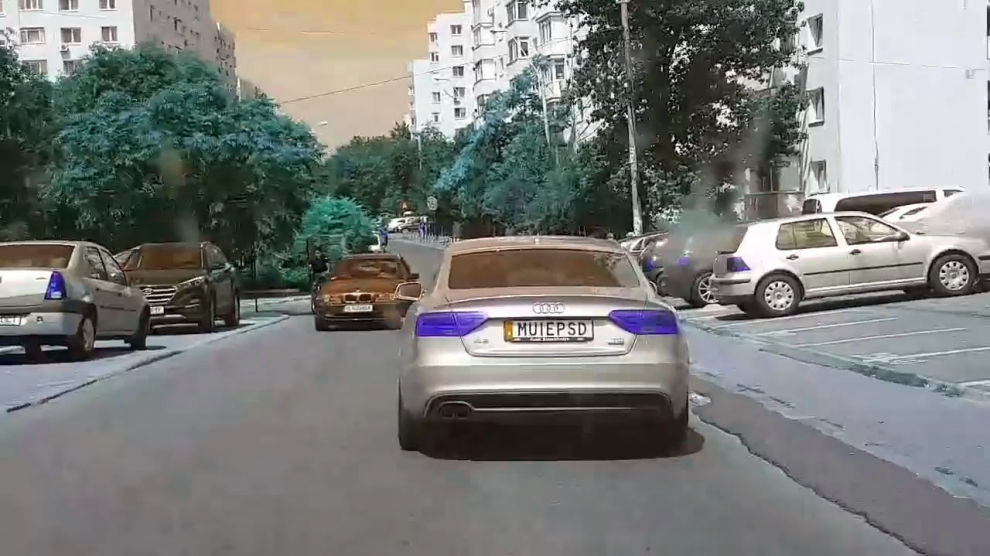

In [55]:
display_pred()